In [39]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib.colors import LightSource

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

%matplotlib inline

In [4]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
realf = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')
real = realf['Bathymetry'][:]
coordsf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/coordinates/NEMO_files/coords_for_agrif.nc')
maskfi = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/ideal_base/mesh_mask.nc')
maskfr = nc.Dataset('/ocean/imachuca/Canyons/results_mackenzie/extended_domain/real_base/mesh_mask.nc')

In [5]:
e1i_mean = np.mean(maskfi['e1t'][0, :, :], axis=0)
e1r_mean = np.mean(maskfr['e1t'][0, :, :], axis=0)

dist_xi = np.cumsum(e1i_mean) 
dist_xr = np.cumsum(e1r_mean) 

e2i_mean = np.mean(maskfi['e2t'][0, :, :], axis=1)
e2r_mean = np.mean(maskfr['e2t'][0, :, :], axis=1)

dist_yi = np.cumsum(e2i_mean) 
dist_yr = np.cumsum(e2r_mean) 

In [6]:
maski = maskfi['tmask'][0, 0, :, :]
maskr = maskfr['tmask'][0, 0, :, :]

ideal_masked = np.ma.array(ideal, mask=1 - maski)
real_masked = np.ma.array(real, mask=1 - maskr)

In [50]:
# http://colorbrewer2.org/#type=sequential&scheme=GnBu&n=6
list_ocean = ['#f7fcf0','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']#'#e0f3db'(2nd)
cmap = LinearSegmentedColormap.from_list('mycmap', list_ocean, N=500, gamma=1)

# contour lines
levels_c = [40.5, 80, 220, 500, 1200]
levels_cf = np.arange(0, 1350, 50)
clocxr, clocxi = 90, 100
clocr=[(clocxr, 190), (clocxr, 220), (clocxr, 230), (clocxr, 250), (clocxr, 260)]
cloci=[(clocxi, 50), (clocxi+80, 140), (clocxi+40, 145), (clocxi, 150), (clocxi, 200)]

# AGRIF
inds_i = [90, 180, 10, 90]
inds_r = [130, 220, 10, 90]

# Figure - Methods 

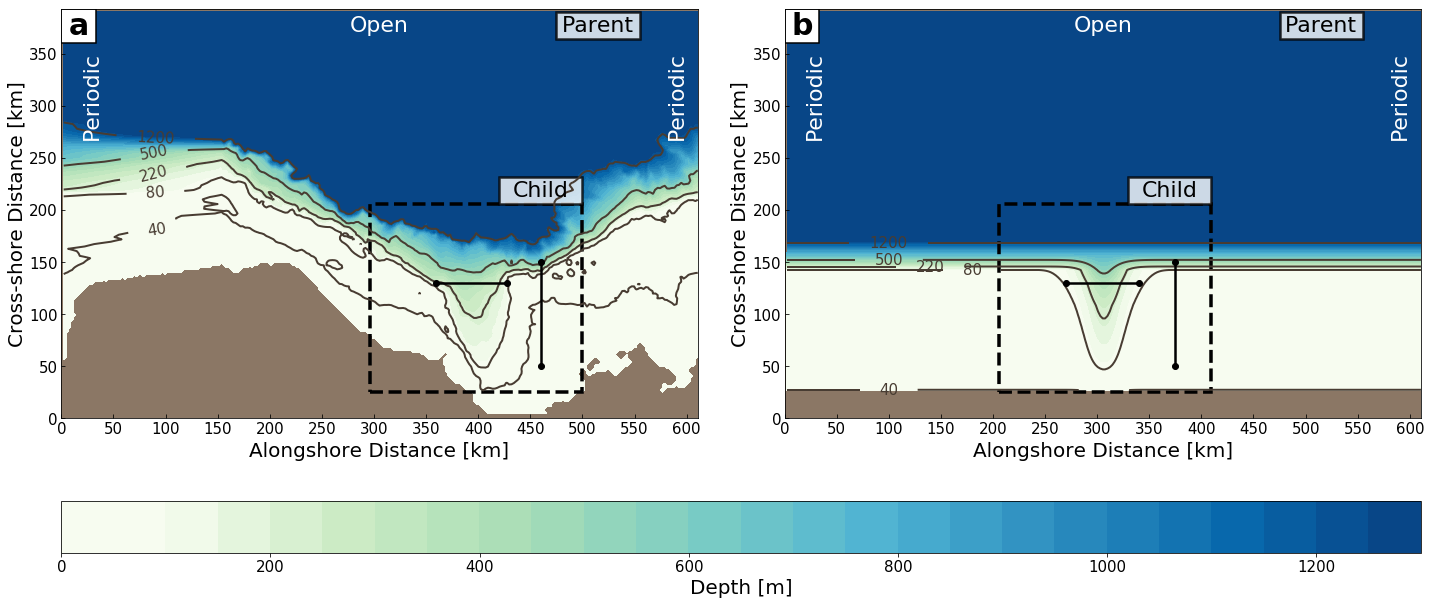

In [28]:
fig = plt.figure(figsize=(20, 9))
gs = gridspec.GridSpec(12, 10)
ax1 = plt.subplot(gs[:-1, :5])
ax2 = plt.subplot(gs[:-1, 5:])
cax = plt.subplot(gs[-1, :])

#fig, (ax1, ax2, cax) = plt.subplots(1,3,figsize=(18, 10), gridspec_kw={"width_ratios":[1,1, 0.08]})

axs = [ax1, ax2]
bathys = [real_masked, ideal_masked]
dist_xs = [dist_xr, dist_xi]
dist_ys = [dist_yr, dist_yi]
masks = [maskr, maski]
clocs = [clocr, cloci]
labs = ['a', 'b']
inds = [inds_r, inds_i]

for ax, bathy, dist_x, dist_y, mask, cloc, ind, lab in zip(axs, bathys, dist_xs, dist_ys, masks, clocs, inds, labs):
    dist_x_km, dist_y_km = dist_x/1000, dist_y/1000
    
    ax.patch.set_color('#8b7765')
    p = ax.contourf(dist_x_km, dist_y_km, bathy, cmap=cmap, vmin=100, vmax=1300, levels=levels_cf, zorder=1)
    c = ax.contour(dist_x_km, dist_y_km, bathy, levels=levels_c, colors='#483C32', linewidths=2, zorder=2)
    plt.clabel(c, inline=1, fontsize=15, fmt='%1.f', manual=cloc, inline_spacing=16)
    
    lw, ms = 2.5, 12
    if ax == ax1:
        x, y1, y2 = 460, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k', marker='.', ms=ms)
        y, x1, x2 = 130, 360, 428
        ax.plot([x1, x2], [y, y], lw=lw, c='k', marker='.', ms=ms)
    if ax == ax2:
        x, y1, y2 =375, 50, 150
        ax.plot([x, x], [y1, y2], lw=lw, c='k', marker='.', ms=ms)
        y, x1, x2 = 130, 270, 340
        ax.plot([x1, x2], [y, y], lw=lw, c='k', marker='.', ms=ms)
        
    # AGRIF 
    imin, imax, jmin, jmax = dist_x_km[ind[0]], dist_x_km[ind[1]], dist_y_km[ind[2]], dist_y_km[ind[3]]
    ax.add_patch(patches.Rectangle((imin, jmin),(imax-imin),(jmax-jmin), fill=None, ec='k', lw=3.5, ls='--')) 
    
    ax.set_xlim([0, dist_x_km[-1]])
    ax.set_ylim([0, dist_y_km[-1]])
    ax.xaxis.set_ticks(np.arange(0, 650, 50))
    ax.yaxis.set_ticks(np.arange(0, 400, 50))
    ax.tick_params(direction='in', length=4, color='k', labelsize=15)
    ax.set_aspect(aspect='equal')
    ax.set_xlabel('Alongshore Distance [km]', fontsize=20, labelpad=5)
    ax.set_ylabel('Cross-shore Distance [km]', fontsize=20, labelpad=3)
    
    # constants
    max_y = dist_y_km[-1]
    max_x = dist_x_km[-1]
    ind_y = 360
    ind_y_mid = ind_y + (max_y-ind_y)*0.5
    fs=22
    # plot label 
    ax.add_patch(patches.Rectangle((0, ind_y),(max_y-ind_y),(max_y-ind_y), fc='w', ec='k', lw=1.5, alpha=1))
    ax.annotate(lab, xy=((max_y-ind_y)*0.5, ind_y_mid), fontsize=30, weight='bold', va='center', ha='center')
    # boundaries
    wt = 'normal'
    ax.text(20, 310, 'Periodic', rotation='vertical', fontsize=fs, color='w', weight=wt, va='center')
    ax.text((max_x-30), 310, 'Periodic', rotation='vertical', fontsize=fs, color='w', weight=wt, va='center')
    ax.text((max_x*0.5), ind_y_mid, 'Open', rotation='horizontal', fontsize=fs, color='w', weight=wt, ha='center', va='center')
    # parent and child
    w, h = 80, 26
    ax.add_patch(patches.Rectangle((475, ind_y_mid-h*0.5),(w),(h), fc='w', ec='k', lw=2.5, alpha=0.8))
    ax.text(475+w*0.5, ind_y_mid, 'Parent', rotation='horizontal', fontsize=fs, color='k', ha='center', va='center')
    ax.add_patch(patches.Rectangle((imax-w, jmax),(w),(h), fc='w', ec='k', lw=2.5, alpha=0.8))
    ax.text(imax-w*0.5, jmax+h*0.5, 'Child', rotation='horizontal', fontsize=fs, color='k', ha='center', va='center')
    #ax.grid(color='w')
    #ax.minorticks_on()
    #ax.grid(b=True, which='minor', color='gray', linestyle='-')
              

# colorbar
ip = InsetPosition(cax, [0, 0, 1, 1]) 
cax.set_axes_locator(ip)
cbar = fig.colorbar(p, cax=cax, ticks=np.arange(50, 1300, 150), orientation='horizontal')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Depth [m]', fontsize=20)
cbar.set_ticks(np.arange(0, 1500, 200))
    
# overall
gs.tight_layout(fig)
gs.update(wspace=1.5, hspace=0.005)
fig.savefig('./bathymetry_dimensions.png', dpi=200, bbox_inches='tight')

# Figure - Map

https://matplotlib.org/basemap/users/stere.html

https://matplotlib.org/basemap/api/basemap_api.html

https://bitbucket.org/canyonsubc/mackenzie_canyon/src/default/tools/functions_plot.py

https://bitbucket.org/canyonsubc/analysis_mackenzie_canyon/src/default/notebooks/presentations/

https://www.kennethmoreland.com/color-maps/


In [40]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        (vmin,), _ = self.process_value(self.vmin)
        (vmax,), _ = self.process_value(self.vmax)
        resdat = np.asarray(result.data)
        result = np.ma.array(resdat, mask=result.mask, copy=False)
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        res = np.interp(result, x, y)
        result = np.ma.array(res, mask=result.mask, copy=False)
        if is_scalar:
            result = result[0]
        return result

In [73]:
# https://superdevresources.com/tools/color-shades#8b7765
list_land = ['#4a3f36','#67594b','#857261','#9e8b7a', '#b4a598','#c9bfb5'] # '#dfd8d3' last
list_ocean = ['#f7fcf0','#e0f3db','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']
list_conc = list_land + list_ocean
colour_list = list_conc[::-1]
cmap = LinearSegmentedColormap.from_list('mycmap', colour_list, N=500, gamma=1)
norm = MidpointNormalize(1000)

x_region, y_region, z_region = functions_plot.def_regionG(xl=-155, xr=-125, yb=66, yt=73)
X, Y = np.meshgrid(x_region, y_region) 
z_full = z_region

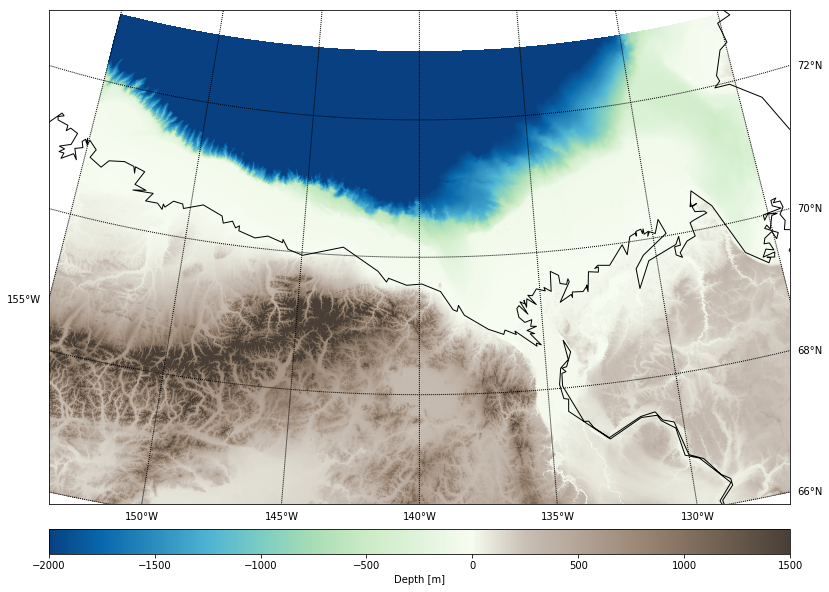

In [86]:
fig, ax = plt.subplots(1,1,figsize=(20, 10))
m = Basemap(width=1200000, height=800000, resolution='l',projection='stere', lat_ts=70, lat_0=70, lon_0=-140.)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,2.), labels=[False,True,True,False])
m.drawmeridians(np.arange(-180.,181.,5.), labels=[True,False,False,True])

lon, lat = m(X, Y) 
p = m.pcolormesh(lon, lat, z_full, cmap=cmap, vmin=-2000, vmax=1500)
cbar = m.colorbar(p,location='bottom',pad="5%")
cbar.set_label('Depth [m]')

plt.show()

fig.savefig('./map_domain.png', dpi=100, bbox_inches='tight')